<a href="https://colab.research.google.com/github/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/blob/main/OLS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8) # set default figure size
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# import merged dataset 

df = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/merged.csv')
df.head()

,Hour,Day,Month,Year,CrashCount,Maximum_Temperature,Temperature,Wind_Chill,Heat_Index,Precipitation,Snow,Snow_Depth,Wind_Speed,Wind_Direction,Wind_Gust,Visibility,Cloud_Cover,Relative_Humidity
0,0,1,1,2016,3,46.0,42.1,31.3,0.0,0.00,0.0,0.0,12.4,314.29,0.0,9.9,73.4,57.83
1,0,1,1,2017,3,55.0,46.0,36.4,0.0,0.00,0.0,0.0,12.7,142.17,24.2,9.9,60.5,51.82
2,0,1,1,2018,3,23.9,18.4,0.7,0.0,0.00,0.0,0.0,19.2,315.63,26.4,9.9,24.8,47.15
3,0,1,1,2019,5,63.9,56.5,43.9,0.0,0.17,0.0,0.0,18.7,283.17,29.5,9.2,69.0,68.71
4,0,1,2,2017,4,50.4,42.5,27.7,0.0,0.00,0.0,0.0,10.6,194.83,0.0,9.9,66.7,65.43


In [4]:
# create a DataFrame of aggregated CrashCount and average precipitation by the hour

hourly = df.groupby(['Hour'], as_index= False).agg({'CrashCount':'sum', 'Precipitation': 'mean'})
hourly

,Hour,CrashCount,Precipitation
0,0,6956,0.116446
1,1,7078,0.115625
2,2,7413,0.116183
3,3,6061,0.114362
4,4,5000,0.115305
5,5,16080,0.122934
6,6,3004,0.121273
7,7,2607,0.114127
8,8,2550,0.123695
9,9,2756,0.128784


                                 OLS Regression Results                                
Dep. Variable:             CrashCount   R-squared (uncentered):                   0.541
Model:                            OLS   Adj. R-squared (uncentered):              0.522
Method:                 Least Squares   F-statistic:                              27.16
Date:                Sat, 24 Apr 2021   Prob (F-statistic):                    2.76e-05
Time:                        22:01:18   Log-Likelihood:                         -233.68
No. Observations:                  24   AIC:                                      469.4
Df Residuals:                      23   BIC:                                      470.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

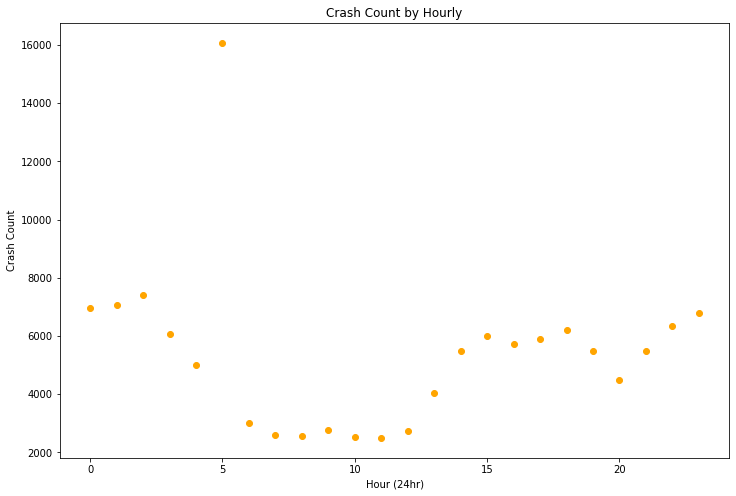

In [5]:
# # Perform OLS Regression based on hourly data and display results

hr = hourly['Hour']
y = hourly['CrashCount']

result = sm.OLS(y, hr).fit()
print(result.summary())

# display crash count by the hour
plt.scatter(hr, y, color='orange')
plt.xlabel('Hour (24hr)')
plt.ylabel('Crash Count')
plt.title('Crash Count by Hourly')
plt.show()

                                 OLS Regression Results                                
Dep. Variable:             CrashCount   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              88.64
Date:                Sat, 24 Apr 2021   Prob (F-statistic):                    2.35e-09
Time:                        22:01:18   Log-Likelihood:                         -224.08
No. Observations:                  24   AIC:                                      450.2
Df Residuals:                      23   BIC:                                      451.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

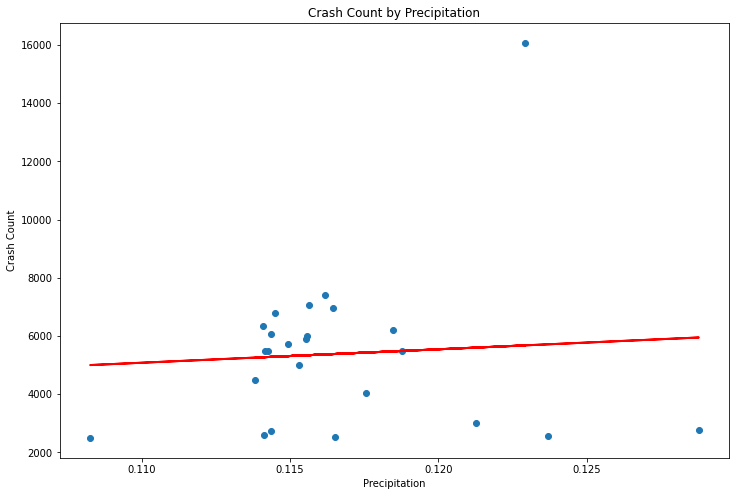

In [6]:
# Perform OLS Regression based on precipitation data and display results

prec = hourly['Precipitation']
y = hourly['CrashCount']

result = sm.OLS(y, prec).fit()
print(result.summary())

# Predict values
result_pred = result.predict()

# Plot regression against actual data
plt.plot(prec, y, 'o')       # scatter plot showing actual data
plt.plot(prec, result_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Precipitation')
plt.ylabel('Crash Count')
plt.title('Crash Count by Precipitation')

plt.show()